## Data Cleaning

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("../data/loan_prediction.csv")

## 1. Data Cleaning

# Replace '3+' in Dependents with numeric value and convert to float
df["Dependents"] = df["Dependents"].replace("3+", 3).astype(float)

# Fill missing values with appropriate strategies
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Married"].fillna(df["Married"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["Credit_History"].fillna(df["Credit_History"].median(), inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace=True)

# Encode categorical features
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df["Married"] = df["Married"].map({"No": 0, "Yes": 1})
df["Education"] = df["Education"].map({"Graduate": 1, "Not Graduate": 0})
df["Self_Employed"] = df["Self_Employed"].map({"No": 0, "Yes": 1})
df["Property_Area"] = df["Property_Area"].map({"Urban": 0, "Semiurban": 1, "Rural": 2})
df["Loan_Status"] = df["Loan_Status"].map({"N": 0, "Y": 1})

# Save cleaned dataset
df.to_csv("../data/cleaned_loan_prediction.csv", index=False)

/var/folders/4t/xsjp3gpx3b34h757myxc0qlm0000gn/T/ipykernel_91661/3873953059.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
/var/folders/4t/xsjp3gpx3b34h757myxc0qlm0000gn/T/ipykernel_91661/3873953059.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

## 2. Exploratory Data Analysis (EDA)

/var/folders/4t/xsjp3gpx3b34h757myxc0qlm0000gn/T/ipykernel_91661/4028683491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Status", data=df, palette="Set2")


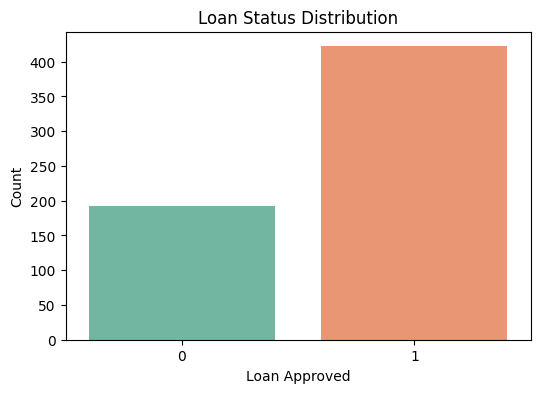

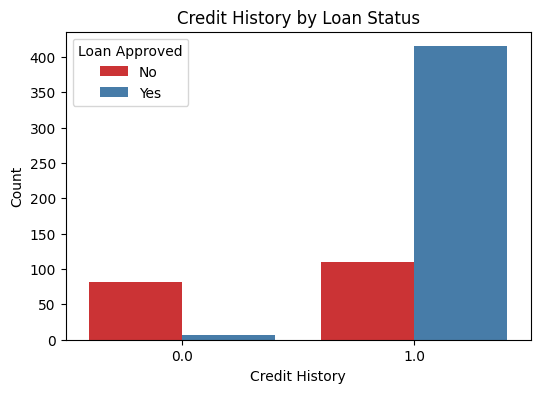


Credit History Meaning:
- 1.0 = Positive credit history (repayment history exists)
- 0.0 = No/poor credit history


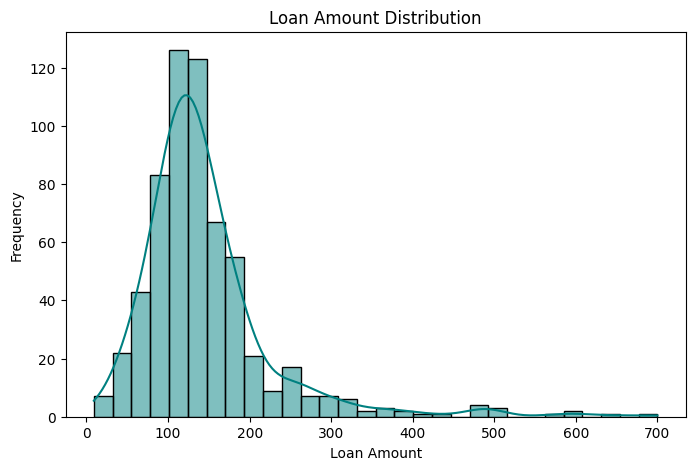

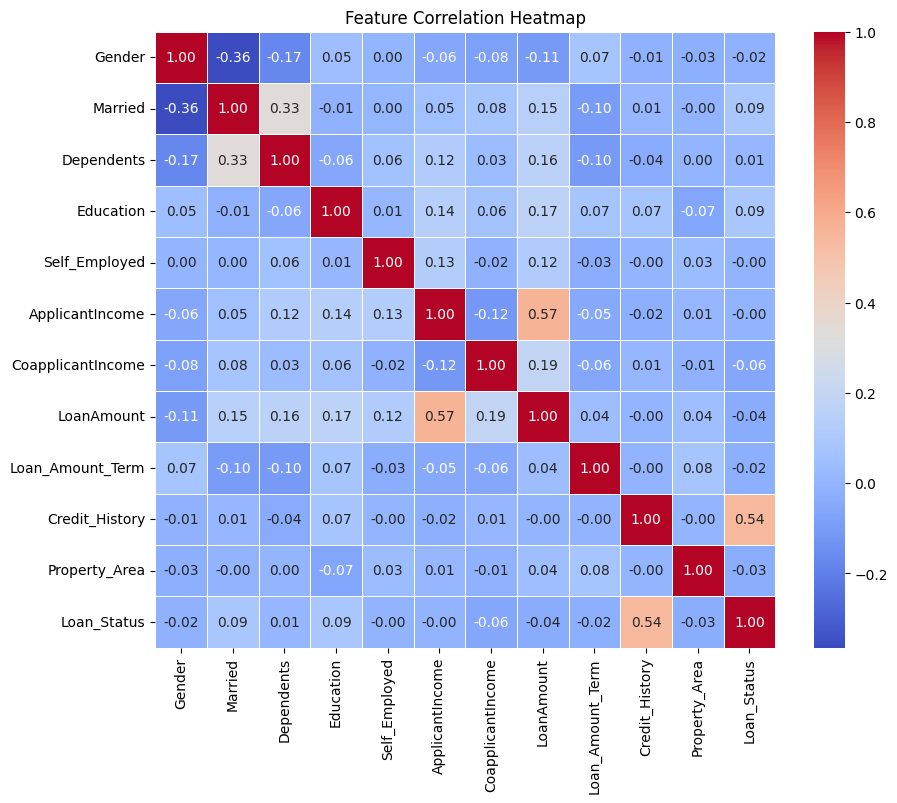

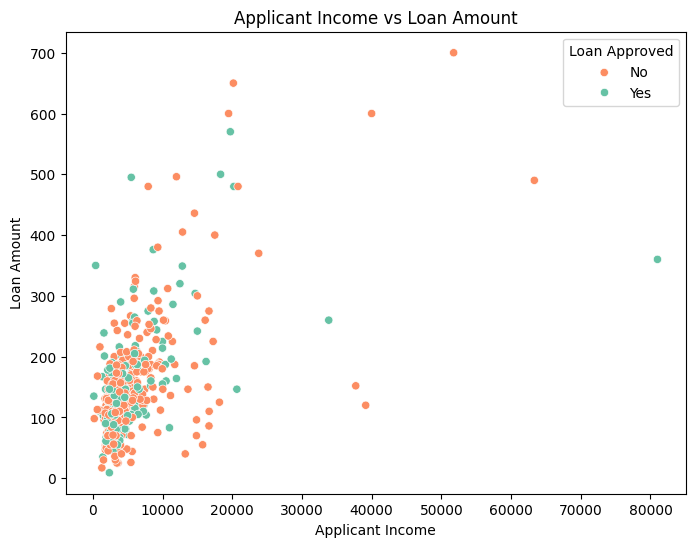


Correlation between Applicant Income and Loan Amount: 0.57

EDA Conclusions:
- Applicants with a credit history are far more likely to get loan approval.
- Most loan amounts fall under a certain threshold — high loan amounts are less common.
- Applicant Income shows moderate correlation with Loan Amount, suggesting income influences loan size.
- Credit History is likely one of the strongest predictors of approval.


In [3]:
# Loan Status distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Loan_Status", data=df, palette="Set2")
plt.title("Loan Status Distribution")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.show()

# Credit history effect
plt.figure(figsize=(6,4))
sns.countplot(x="Credit_History", hue="Loan_Status", data=df, palette="Set1")
plt.title("Credit History by Loan Status")
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.legend(title="Loan Approved", labels=["No", "Yes"])
plt.show()

print("\n\033[1mCredit History Meaning:\033[0m")
print("- 1.0 = Positive credit history (repayment history exists)")
print("- 0.0 = No/poor credit history")

# Loan amount distribution
plt.figure(figsize=(8,5))
sns.histplot(df["LoanAmount"], bins=30, kde=True, color="teal")
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# Heatmap of correlations
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Scatterplot: Income vs Loan Amount
plt.figure(figsize=(8,6))
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=df, hue="Loan_Status", palette="Set2")
plt.title("Applicant Income vs Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.legend(title="Loan Approved", labels=["No", "Yes"])
plt.show()

correlation_value = df[["ApplicantIncome", "LoanAmount"]].corr().iloc[0,1]
print(f"\n\033[1mCorrelation between Applicant Income and Loan Amount:\033[0m {correlation_value:.2f}")

print("\n\033[1mEDA Conclusions:\033[0m")
print("- Applicants with a credit history are far more likely to get loan approval.")
print("- Most loan amounts fall under a certain threshold — high loan amounts are less common.")
print("- Applicant Income shows moderate correlation with Loan Amount, suggesting income influences loan size.")
print("- Credit History is likely one of the strongest predictors of approval.")

# Export Charts and Data for reporting

In [6]:
import json
from collections import defaultdict
import numpy as np

eda_results = defaultdict(dict)

# 1. Loan Status Counts
eda_results["loan_status_counts"] = {str(k): int(v) for k, v in df["Loan_Status"].value_counts().items()}

# 2. Credit History vs Loan Status
credit_vs_loan_status = (
    df.groupby(["Credit_History", "Loan_Status"])
    .size()
    .unstack()
    .fillna(0)
)

eda_results["credit_vs_loan_status"] = {
    str(k): {str(col): int(val) for col, val in v.items()}
    for k, v in credit_vs_loan_status.iterrows()
}

# 3. Loan Amount Stats
eda_results["loan_amount_dist"] = {
    "min": float(df["LoanAmount"].min()),
    "max": float(df["LoanAmount"].max()),
    "mean": float(df["LoanAmount"].mean()),
    "count": int(df["LoanAmount"].count()),
}

# Export to JSON
with open("../static/data/eda_results.json", "w") as f:
    json.dump(eda_results, f, indent=4)

print("✅ EDA results saved to app/static/data/eda_results.json.")


✅ EDA results saved to app/static/data/eda_results.json.
